In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import keras.backend as K
from keras.models import Sequential
import tensorflow as tf
from keras.optimizers import Optimizer
from keras.layers.core import Dense

Using TensorFlow backend.


In [2]:
def swish(x):
    return x*K.sigmoid(x)

# Custom activation function 1
# mix between relu and positive part of swish mirrored across x=1
def e_swish_1(x):
    return K.maximum(0.0, x*(2-K.sigmoid(x)))

def e_swish_2(x):
    sigmoid = K.sigmoid(x)
    return K.maximum(x*K.sigmoid(x), x*(2-K.sigmoid(x)))

# Custom activation function 3 - Hand designed
# e_swish_2 made derivable
def e_swish_3(x):
    return K.maximum(6*K.sigmoid(x)*(1-K.sigmoid(x))*x*K.sigmoid(x), x*(2-K.sigmoid(x)))

# Custom activation function 4 - Reduced operations for e_swish_3 
# e_swish_2 made derivable (more similar to swish in the negative part)
def e_swish_4(x):
    return K.maximum((1+0.25/(K.exp(K.abs(x))-0.5))*x*K.sigmoid(x), x*(2-K.sigmoid(x)))

def e_swish_5(x):
    return K.maximum(-x*K.sigmoid(-x), x*K.sigmoid(x))

def leaky_relu(x):
    return K.maximum(0.3*x,x)

In [3]:
a = 25
x = np.array([[i, j] for i in range(-a, a+1) for j in range(-a, a+1)])
print(x.shape)

(2601, 2)


In [4]:
def create(act, l=5):
    np.random.seed(42)
    tf.set_random_seed(42)
    model = Sequential()
    model.add(Dense(128, activation=act, input_dim=2))
    for i in range(l):
        model.add(Dense(128, activation=act, kernel_initializer='random_normal', bias_initializer='zeros'))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [5]:
def calc(act, data=x):
    model = create(act)
    res = model.predict(data)
    return res

In [6]:
%matplotlib notebook
def show_1(act, act_name, data=x, lims=(0.495, 0.58)):
    # Part One
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.title(act_name+" Output Landscape")
    # Make data.
    X = np.outer(np.linspace(1,2*a+1,2*a+1), np.ones(2*a+1))-(a/2)+1
    Y = X.copy().T
    Z = calc(act, x)[:, 0].reshape(2*a+1,2*a+1)
    # Plot the surface
    print(X.shape, Y.shape, Z.shape) 
    surf = ax.plot_surface(X, Y, Z, cmap="seismic", linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.set_zlim(lims[0], lims[1])
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    # Show Part 1
    plt.show()

In [7]:
def show_2(act, act_name, data=x):
    fig, ax = plt.subplots(1,1)
    # Part 2
    pred = calc(act, x)
    # Print image.
    ax.imshow(pred.reshape(2*a+1,2*a+1), cmap="seismic_r")
    # Set labels
    xlabel = "Activation: {}".format(act_name)
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

<IPython.core.display.Javascript object>


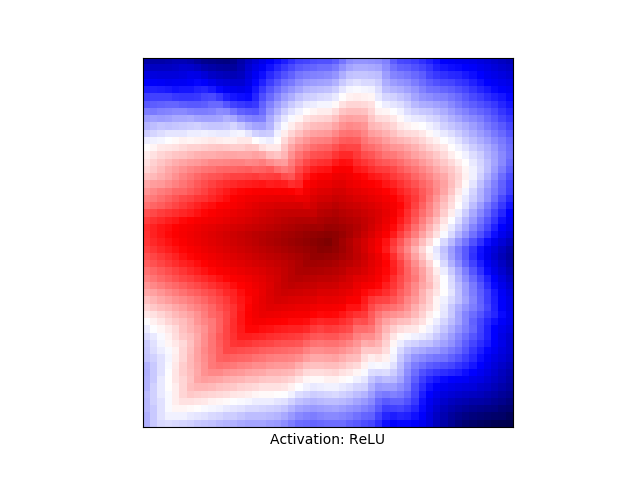

In [8]:
show_2("relu", "ReLU", x)

<IPython.core.display.Javascript object>


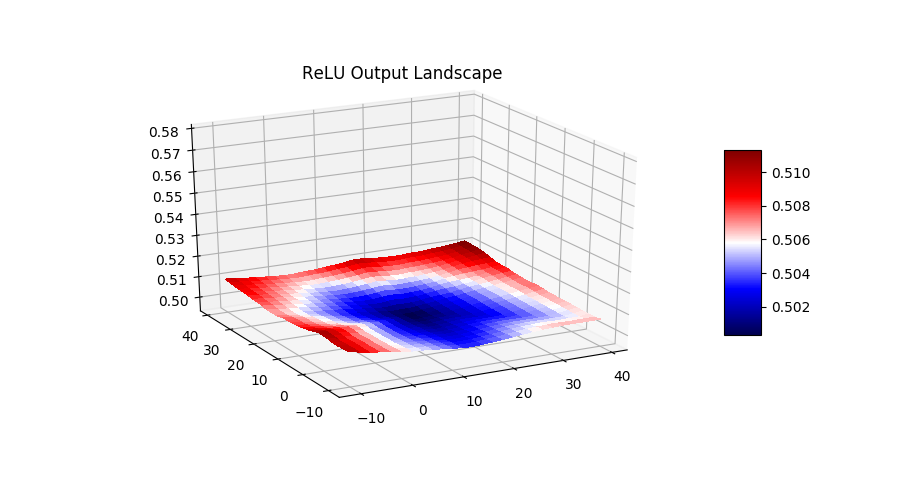

(51, 51) (51, 51) (51, 51)


In [9]:
show_1("relu", "ReLU", x)

<IPython.core.display.Javascript object>


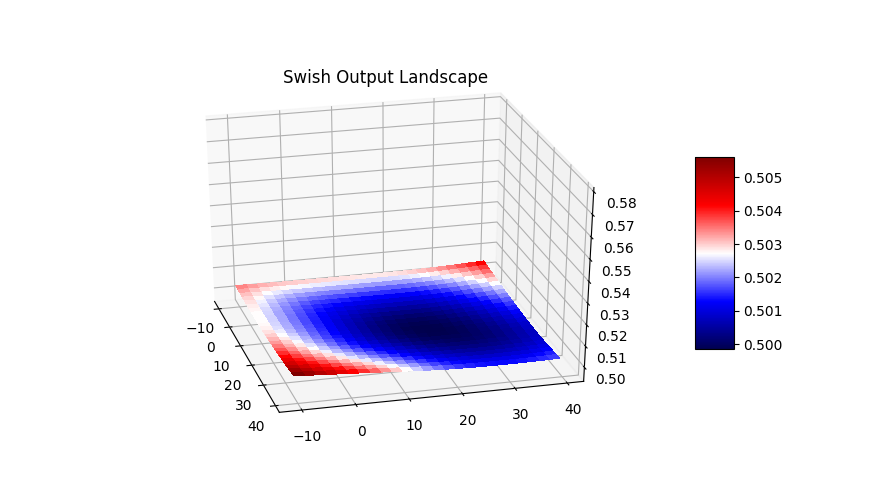

(51, 51) (51, 51) (51, 51)


In [11]:
show_1(swish, "Swish", x)

<IPython.core.display.Javascript object>


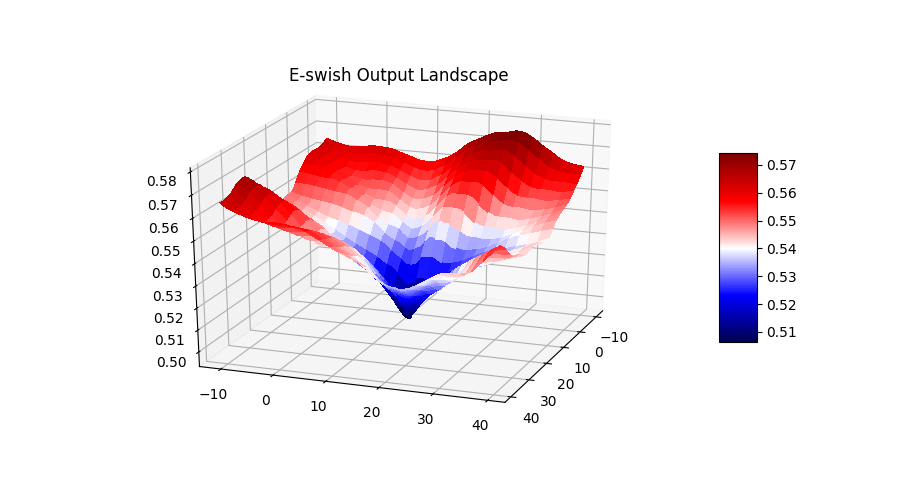

(51, 51) (51, 51) (51, 51)


In [15]:
show_1(e_swish_2, "E-swish", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


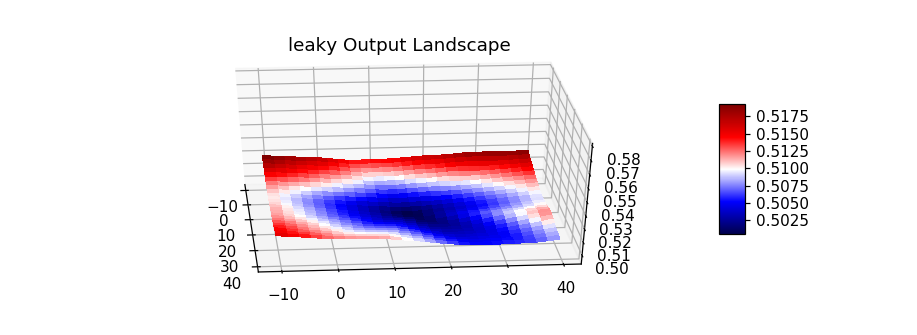

(51, 51) (51, 51) (51, 51)


In [39]:
show_1(leaky_relu, "leaky", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


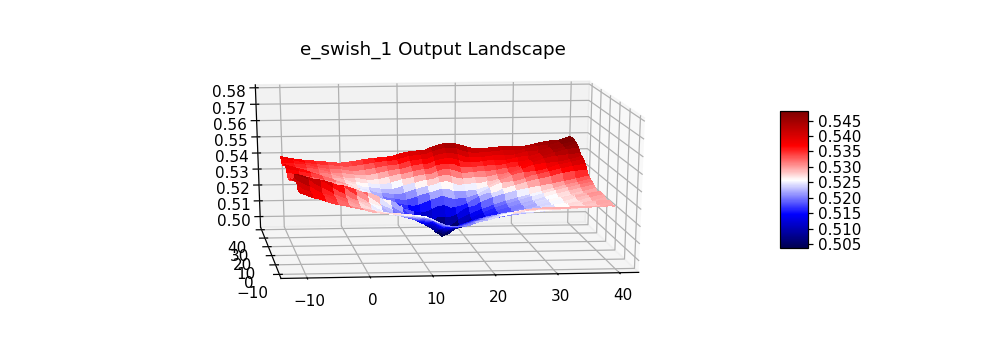

(51, 51) (51, 51) (51, 51)


In [45]:
show_1(e_swish_1, "e_swish_1", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


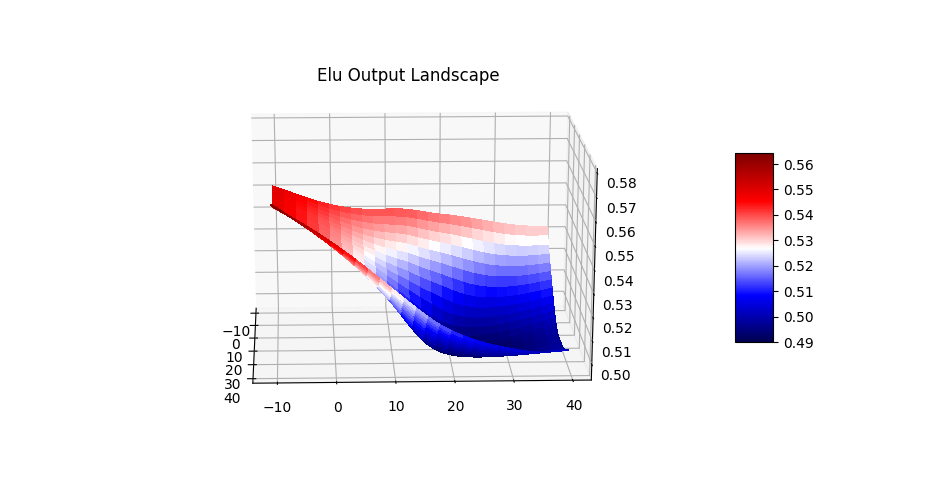

(51, 51) (51, 51) (51, 51)


In [14]:
show_1("elu", "Elu", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


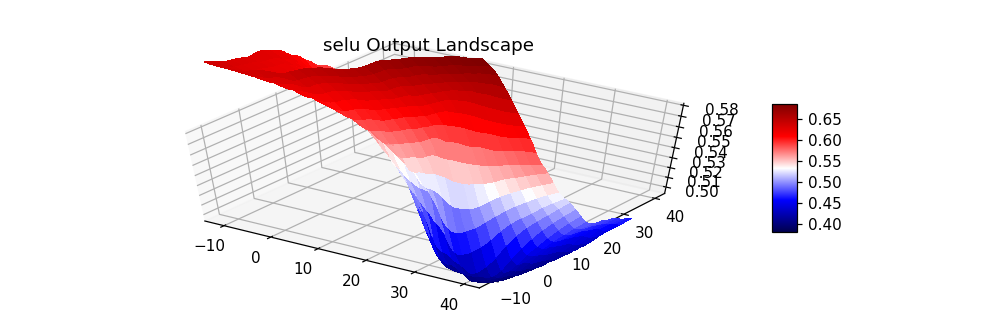

(51, 51) (51, 51) (51, 51)


In [48]:
show_1("selu", "selu", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


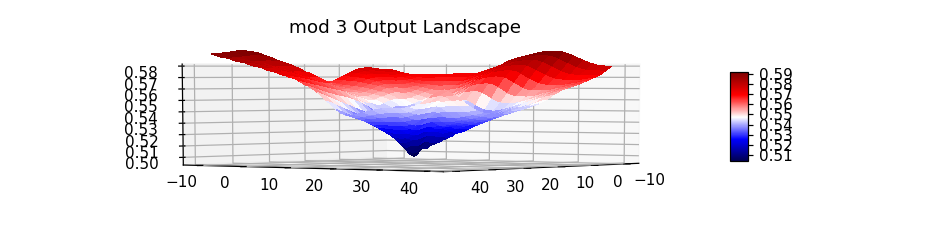

(51, 51) (51, 51) (51, 51)


In [49]:
show_1(e_swish_3, "mod 3", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


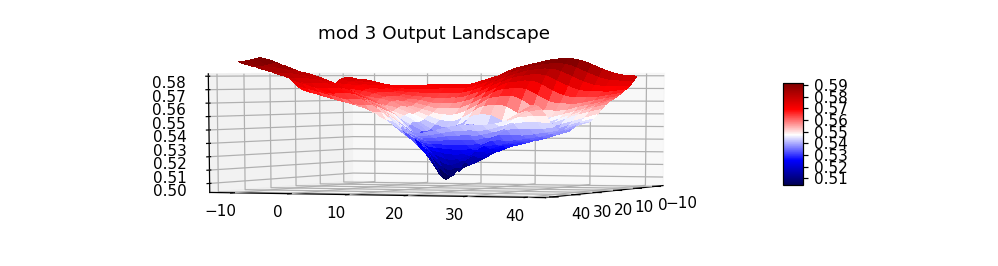

(51, 51) (51, 51) (51, 51)


In [50]:
show_1(e_swish_3, "mod 3", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


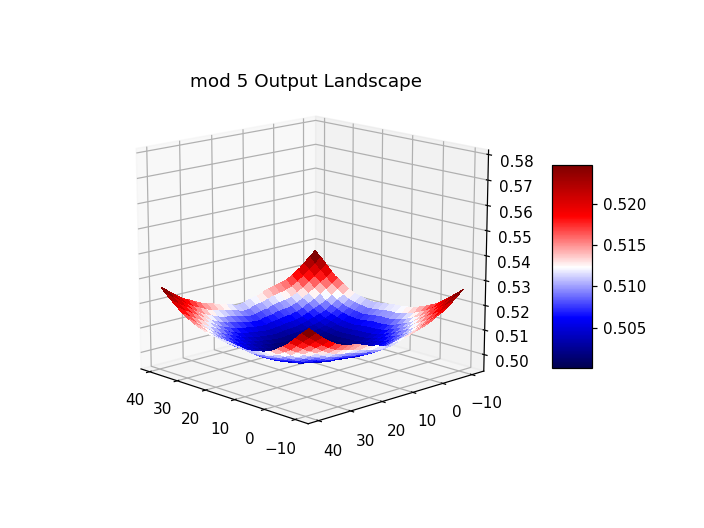

(51, 51) (51, 51) (51, 51)


In [17]:
show_1(e_swish_5, "mod 5", x, lims=(0.495, 0.58))

<IPython.core.display.Javascript object>


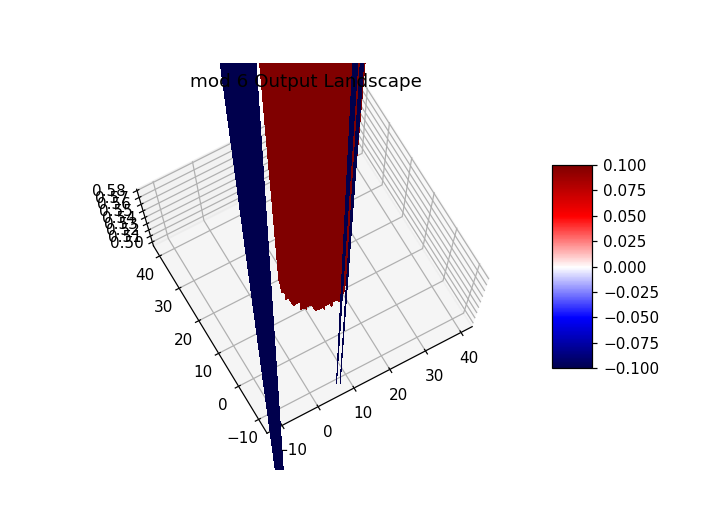

(51, 51) (51, 51) (51, 51)


In [15]:
show_1(e_swish_6, "mod 6", x, lims=(0.495, 0.58))